# Assignment III

You can work on this assignment on your own or in pairs. 

I would like you to be a bit creative with this last one, I will give you a suggested list, but feel free to add some extra analysis! Data science is never a rutine or a standard procedure ;)

- Pick a meaningful dataset for you
- **Briefly** summarize what it contains
- Test at least 3 hypothesis. Define them previously, writing down H0 and H1, your significance level and confidence. Would be nice if you use different tests. Extra points if the tests are interesting ;)
- Pick two numerical variables and adjust a linear model between them. Show the plot and describe what can be said about the model ($R^2$, coefficients, significance...). I don't want the variables to be perfectly correlated, I want the explanation to be right and clear. It is fine if the model is a disaster.
- Adjust a new model with at least 2 independent variables. One of them should be categorical and the other one numerical. Give a meaningful interpretation of the model. Does it increase its performance against the simple regression one? How?

Be visual please! Think about this assignment more like a business report rather than a university activity.

Some suggested sources for datasets:

- https://www.kaggle.com/datasets?fileType=csv&sizeEnd=50%2CMB
- https://piktochart.com/blog/100-data-sets/
- https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-857a348883b5
- https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv

or...

Dataset Name:- Canada Immigration Data <br>
Source:- https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-857a348883b5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('Canada_by_Citizenship.csv')
data.columns
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [115]:
data.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


This Data represents the number of immigrants to Canada grouped by country <br>

<h1>Columns are <br></h1>
1-Type <br>
2- Coverage<br>
3- __OdName__ :- Country Name <br>
4- Area:- continent Code <br>
5- AreaName :- continent (Asia, Africa, Europe...etc) <br>
6-Reg:- Region code <br>
7- __RegName__ :- Region Name ( Soutern Asia, Southern Europe , Northern Africa ...etc) <br>
8-Dev :- 901 for developed countries, 902 for developing countries <br>
9- __DevName__ :- Developing regions or Developed regions <br>
10,11,12... :- Counts of immigrants per year<br>

letus have deeper look at 2013 data 


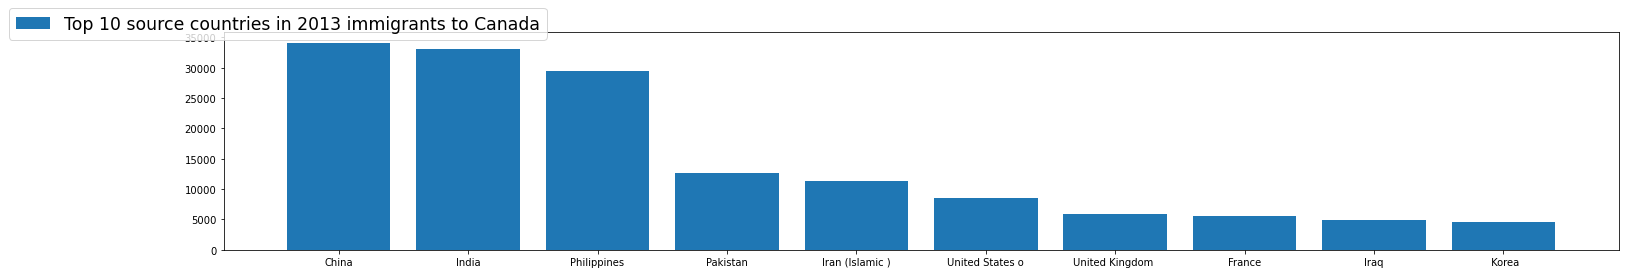

In [2]:
#clean & prepare data
data.sort_values(by='2013',ascending=False, inplace=True)
data= data[data['DevName']!='World']
data.OdName=data.OdName.str.replace('Republic of','')
data= data[data.OdName!='Total']

#draw the top 10 countries 
fig, ax = plt.subplots(1)
ax=plt.bar(data.OdName.str.slice(start=0,stop=15).head(10),data['2013'].head(10))
fig.legend(['Top 10 source countries in 2013 immigrants to Canada'],loc='upper left',fontsize='xx-large')
fig.set_figwidth(25)
plt.show()

<AxesSubplot:ylabel='DevName'>

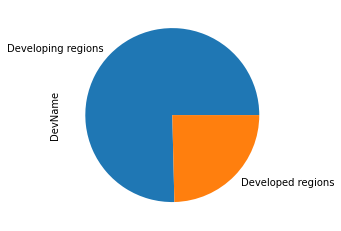

In [3]:
data.DevName.value_counts().plot.pie()

<AxesSubplot:ylabel='OdName'>

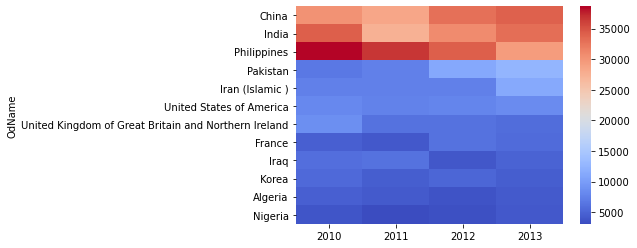

In [4]:
indexedData= data.set_index('OdName')
indexedData.sort_values(by='2013',inplace=True,ascending=False)
sns.heatmap(indexedData[['2010','2011','2012','2013']].head(12),cmap="coolwarm")


In [5]:
data['2013'].describe()

count      195.000000
mean      1320.702564
std       4237.951988
min          0.000000
25%         45.000000
50%        213.000000
75%        796.000000
max      34129.000000
Name: 2013, dtype: float64

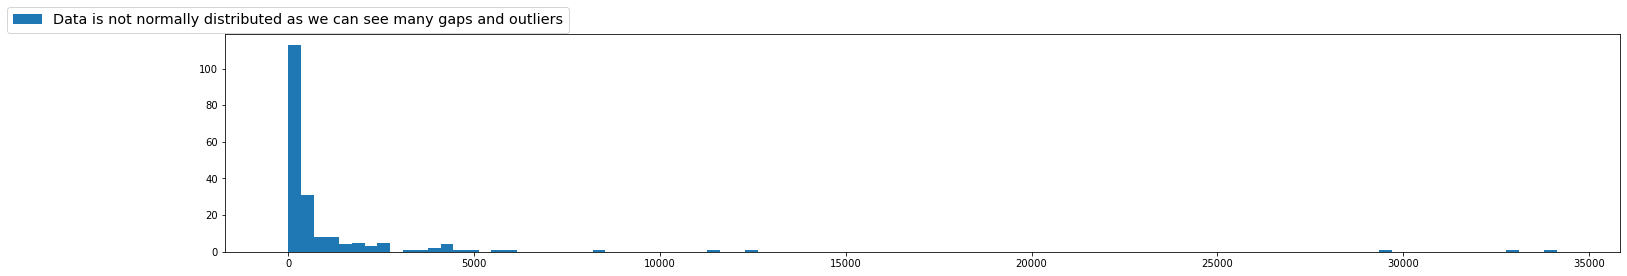

In [6]:
fig, ax = plt.subplots(1)
ax=plt.hist(data['2013'],bins=100)
fig.set_figwidth(25)
fig.legend(['Data is not normally distributed as we can see many gaps and outliers'],loc='upper left',fontsize='x-large')
plt.show()


<h1> KS Test to check if data is normally distributed</h1>


Now we will apply __KS__ test to check if 2013 data is normally distributed<br>
H0:- data is normally distributed <br>
H1:- data is not normally distributed 

In [7]:
from scipy import stats
stats.kstest(data['2013'],"norm")

KstestResult(statistic=0.9012142045324725, pvalue=1.9548630483506195e-196)

<h3>P value is too small, which is expected, because data have many gaps ranges <br>
the result of test means this data is not normally distributed</h3> 

<h1>Paired T Test<h1>


now we will apply __T Test__ to check similarity between 2012 and 2013 with confidence Interval 95 <br>
H0:- 2012 and 2013 data are similar <br>
H1:- 2012 and 2013 data are not similar

In [8]:
from scipy import stats
test_statistic, pvalue= stats.ttest_rel(data['2012'],data['2013'])
if(pvalue>.05) :
    print('2012 & 2013 immigrants counts are similar  ')
    print('with confidence level 95%, we dont have enough evidence to reject H0')
else :
    print('2012 & 2013 immigrants counts are not similar  ')
    print('with confidence level 95%, we  have enough evidence to reject H0')

2012 & 2013 immigrants counts are similar  
with confidence level 95%, we dont have enough evidence to reject H0



<h1>T Test for Sample</h1>

now we will take sample and check if it is good representation for population <br>
We are lucky that we have population mean, in real world we will use sample mean instead <br> 
H0:- Europe Data in 2013 is good representation of the population <br>
H1:- Europe data in 2013 can't represent population

In [123]:
OnlyEurope_data = data[data.AreaName=='Europe']
test_statistic, pvalue= stats.ttest_1samp(OnlyEurope_data['2013'], popmean=data['2013'].mean())
print('pval ={}, test statistic ={}'.format(pvalue,test_statistic))
if(pvalue>.05) :
    print('2013 Europe immigrants can represent the population  ')
    print('with confidence level 95%, we dont have enough evidence to reject H0')
else :
    print('2013 Europe immigrants can not represent the population ')
    print('with confidence level 95%, we  have enough evidence to reject H0')

pval =0.001646208704964653, test statistic =-3.364637796537906
2013 Europe immigrants can not represent the population 
with confidence level 95%, we  have enough evidence to reject H0


<h1>Another T Test for Sample</h1>

Now we will repeat the same test but with  random sample 


In [124]:
Random_data = data.sample(frac=.5)
test_statistic, pvalue= stats.ttest_1samp(Random_data['2013'], popmean=data['2013'].mean())
print('pval ={}, test statistic ={}'.format(pvalue,test_statistic))
if(pvalue>.05) :
    print('2013 Random sample of immigrants can represent the population  ')
    print('with confidence level 95%, we dont have enough evidence to reject H0')
else :
    print('2013 Random sample of immigrants can not represent the population ')
    print('with confidence level 95%, we  have enough evidence to reject H0')

pval =0.9202682777690545, test statistic =-0.10035669943280623
2013 Random sample of immigrants can represent the population  
with confidence level 95%, we dont have enough evidence to reject H0


<h1>Anova Test</h1>

Now we will apply Anova test for 2010,2011,2012,2013


In [125]:
from scipy import stats
test_statistic, pvalue= stats.f_oneway(data['2010'],data['2011'],data['2012'],data['2013'])
print('pval ={}, test statistic ={}'.format(pvalue,test_statistic))
if(pvalue>.05) :
    print('2010,2011,2012 & 2013 immigrants counts are similar  ')
    print('with confidence level 95%, we dont have enough evidence to reject H0')
else :
    print('2010,2011,2012 & 2013immigrants counts are not similar  ')
    print('with confidence level 95%, we  have enough evidence to reject H0')

pval =0.9864868684681672, test statistic =0.04700407592214746
2010,2011,2012 & 2013 immigrants counts are similar  
with confidence level 95%, we dont have enough evidence to reject H0


<h1>Chi Square Test</h1>

now we have categorical value which is Developed or Developing country<br>
we will check it against immigration rate in 2013 data using Chi square test <br>
we will create new column ImmigrationRate which  will have 3 categorical values (High, Medium, Low based on 2013 data )<br>
Min immigration count in 2013 is Zero, Max is 34129 <br>
so we will assume Low immigration rate is below 12000, medium between 12000 and 24000 . and high above 24000<br>
<br>
H0:- immigration rate and country status (Developed or developing) are independent <br>
H1:- they are dependant 


In [126]:
data['ImmigrationRate']= np.where(data['2013']>24000, 'High', np.where(data['2013']>12000, 'Medium', 'Low') ) 
crosstab=pd.crosstab(data.DevName,data.ImmigrationRate)
chi2values= stats.chi2_contingency(crosstab)
chi2values
pvalue= chi2values[1]
if(pvalue>.05) :
    print('immigration rate is independent on developing the country ')
    print('with confidence level 95%, we dont have enough evidence to reject H0')
else :
    print('immigration rate depends on developing the country ')
    print('with confidence level 95%, we  have enough evidence to reject H0')

(1.3334757986964418,
 0.5133805482569802,
 2,
 array([[  0.73846154,  47.01538462,   0.24615385],
        [  2.26153846, 143.98461538,   0.75384615]]))

immigration rate is independent on developing the country 
with confidence level 95%, we dont have enough evidence to reject H0


<h1>Weird, I was expecting that Immigration depends on either source country is developed or developing, but the chi square test proved the opposite</h1>

In [304]:
data['2013'].describe()

count      195.000000
mean      1320.702564
std       4237.951988
min          0.000000
25%         45.000000
50%        213.000000
75%        796.000000
max      34129.000000
Name: 2013, dtype: float64

<h1>Z Test</h1>

We know mean is 1320.702564, we will run __z test __ on sample to check if the mean is 1300 <br>
H0:- population mean = 1300<br>
H1:- population mean != 1300 <br>
Confidence Range 95%<br>
__Note:- z test here is meaningless, but i just made it __<br>


In [138]:
sample= data.sample(frac=.25)
from statsmodels.stats.weightstats import ztest
zstatistics,pvalue= ztest(sample['2013'],value=1300,alternative='two-sided',usevar='pooled',ddof=1)
print('pval ={}, test statistic ={}'.format(pvalue,test_statistic))
if(pvalue>.05) :
    print('with confidence level 95%, we dont have enough evidence to reject H0')
else :
    print('with confidence level 95%, we  have enough evidence to reject H0')

pval =0.5339638699608071, test statistic =0.04700407592214746
with confidence level 95%, we dont have enough evidence to reject H0


<h1>Another Z Test</h1>

Again, we will run z test on sample to check if the mean is 4000(outlier value)<br>
H0:- population mean = 4000<br>
H1:- population mean != 4000<br>
Confidence Range 95%<br>

In [139]:
zstatistics,pvalue= ztest(sample['2013'],value=4000,alternative='two-sided',usevar='pooled',ddof=1)
print('pval ={}, test statistic ={}'.format(pvalue,test_statistic))
if(pvalue>.05) :
    print('with confidence level 95%, we dont have enough evidence to reject H0')
else :
    print('with confidence level 95%, we  have enough evidence to reject H0')

pval =0.002239749917044965, test statistic =0.04700407592214746
with confidence level 95%, we  have enough evidence to reject H0


<h1>Linear Regression</h1>

checking if there is corrolation between 2012 and 2013 data 

In [213]:
np.corrcoef(data['2012'],data['2013'])

array([[1.        , 0.99957395],
       [0.99957395, 1.        ]])

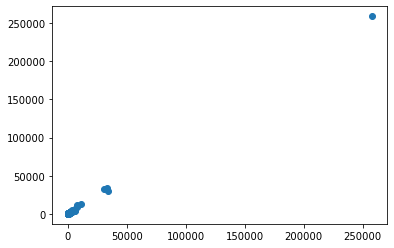

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(data['2012'],data['2013'])

<h3>This is really perfect corrolation because there are almost similar data , however , in real life, I will never get corrolation like this. </h3>

<h1>Linear Regression using SkLearn.linearRegression<br><h1>

LinearRegression()

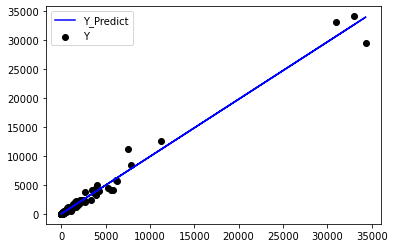

In [141]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
sk_model= linear_model.LinearRegression()

X= data[['2012']]
Y= data['2013']
sk_model.fit(X,Y)
Y_Predict = sk_model.predict(X)
_=plt.scatter(X,Y,color = "black")
_=plt.plot(X,Y_Predict,color="Blue")
_=plt.legend(['Y_Predict','Y'])
plt.show()


In [142]:
print("R cuadrado: ",r2_score(Y, Y_Predict))

R cuadrado:  0.9832199543401108


R squares is square the corrolation coefficent, which identifies the strength of the relationship between X and Y, <br>
R can have values from -1 to 1 while R2 can have values from 0 to 1<br>
1 means X and Y are highly corrolated <br>
Zero means X and Y does not have linear relation 


In [143]:
print('intercept is {}'.format(sk_model.intercept_))

intercept is 20.76003563444283


<h3> intercept is b value in formula y=mx+b, we can consider it as value of y in case x=0</h3>

In [144]:
print('coefficient is {}'.format(sk_model.coef_))

coefficient is [0.98933266]


<h3>Coefficient is the slope, the m in formula y=mx+b</h3>

In [145]:
print('Mean square error is {}'.format(mean_squared_error(Y,Y_Predict)))

Mean square error is 299828.09222213126


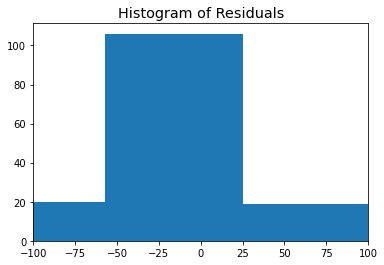

In [146]:
errors = Y - Y_Predict

_=plt.hist(errors,bins = 100)
_=plt.xlim([-100,100])
_= plt.title('Histogram of Residuals',fontsize='x-large')
_= plt.show()

<h3>Mean square error is the square root of summation of all residuals</h3>

<br><br><br>
<h1> Now I will load one more Dataset to explore more Linear Regression <br> </h1>

In [147]:
countries_data=pd.read_csv('countries of the world.csv')
countries_data.dropna(subset=['Birthrate', 'Deathrate'],inplace=True)
countries_data.rename(columns = {'GDP ($ per capita)':'GDP'}, inplace = True)
countries_data['Country']=countries_data['Country'].str.strip()
countries_data['Population']=countries_data['Population'].astype(float)
countries_data['Birthrate']=countries_data['Birthrate'].str.replace(',','')
countries_data['Deathrate']=countries_data['Deathrate'].str.replace(',','')
countries_data['Birthrate']=countries_data['Birthrate'].astype(float)
countries_data['Deathrate']=countries_data['Deathrate'].astype(float)

In [148]:
countries_data.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP,Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.000000,647500,"48,0","0,00","23,06","163,07",700.000000,"36,0","3,2","12,13","0,22","87,65",1,466.000000,2034.000000,"0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655.000000,28748,"124,6","1,26","-4,93","21,52",4500.000000,"86,5","71,2","21,09","4,42","74,49",3,1511.000000,522.000000,"0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091.000000,2381740,"13,8","0,04","-0,39",31,6000.000000,"70,0","78,1","3,22","0,25","96,53",1,1714.000000,461.000000,"0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794.000000,199,"290,4","58,29","-20,71","9,27",8000.000000,"97,0","259,5",10,15,75,2,2246.000000,327.000000,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201.000000,468,"152,1","0,00","6,6","4,05",19000.000000,"100,0","497,2","2,22",0,"97,78",3,871.000000,625.000000,NaN,NaN,NaN


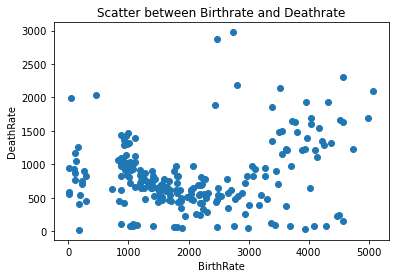

In [149]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
_=ax.scatter(countries_data['Birthrate'],countries_data['Deathrate'])
_=ax.set_title('Scatter between Birthrate and Deathrate')
_=ax.set_xlabel('BirthRate')
_= ax.set_ylabel('DeathRate')
plt.show()

<h1>Now we will try Linear regression between Birthrate and Deathrate using StatsModel</h1>

In [150]:
import statsmodels.formula.api as smf
train_data= countries_data.head(150)
train_data = {"x" : train_data['Birthrate'], "y" : train_data['Deathrate']}
stats_model = smf.ols('y ~ x', data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     9.361
Date:                Fri, 04 Dec 2020   Prob (F-statistic):            0.00249
Time:                        11:52:21   Log-Likelihood:                -1700.1
No. Observations:                 223   AIC:                             3404.
Df Residuals:                     221   BIC:                             3411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    647.7467     65.122      9.947      0.0

<h3> In the summary Above, The R2 is 0.041<br>
Intercept is 647.7467 <br>
Coeffificent (Slope) is 0.0834<br> </h3>
P value for Intercept t-test is zero, which means H1, which means Intercept is not equal to zero <br>
P value for x(Slope) t-test is 0.002 which is very low, which means H1, Slope not equal to zero<br>

In [70]:
test_data = {"x" : countries_data.tail(74)['Birthrate']}
y_pred= stats_model.predict(test_data)

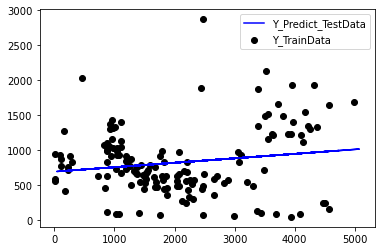

In [74]:
_= plt.scatter(train_data['x'],train_data['y'],color = "black")
_= plt.plot(test_data['x'],y_pred,color="Blue")
_=plt.legend(['Y_Predict_TestData','Y_TrainData'])
plt.show()

In [75]:
from statsmodels.tools.eval_measures import rmse
rmse = rmse(countries_data.tail(74)['Deathrate'], y_pred)
print('mean square error is {}'.format(rmse))

mean square error is 540.8345318601324


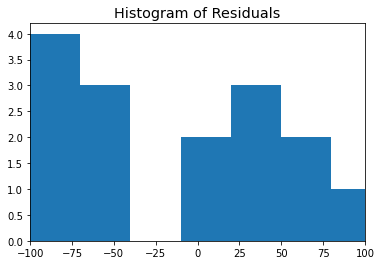

In [76]:
errors = countries_data.tail(74)['Deathrate'] - y_pred

_=plt.hist(errors,bins = 100)
_=plt.xlim([-100,100])
_= plt.title('Histogram of Residuals',fontsize='x-large')
_= plt.show()

<br><br><br>
<h1>Now we will build linear regression model with 2 numerical independants variables and one categorical variable <h1>

In [96]:
pd.set_option('float_format', '{:f}'.format)
countries_data.Population.describe()

count          223.000000
mean      29212276.766816
std      118894046.877151
min           7026.000000
25%         452950.500000
50%        5042920.000000
75%       18125156.000000
max     1313973713.000000
Name: Population, dtype: float64

we will will convert Population to categorical variable High,Medium and Low

In [155]:
from pandas.api.types import CategoricalDtype
cat = pd.Categorical(["HighPopulation","MediumPopulation","LowPopulation"])
cat_type = CategoricalDtype(categories=cat, ordered=True)
countries_data['PopulationCategory']=np.where(countries_data['Population']>18125156, 'HighPopulation', np.where(countries_data['Population']>5042920,'MediumPopulation', 'LowPopulation') )
countries_data['PopulationCategory']=countries_data['PopulationCategory'].astype(cat_type)
countries_data[['Population','PopulationCategory']]

,Population,PopulationCategory
0,31056997.000000,HighPopulation
1,3581655.000000,LowPopulation
2,32930091.000000,HighPopulation
3,57794.000000,LowPopulation
4,71201.000000,LowPopulation
...,...,...
220,108605.000000,LowPopulation
222,2460492.000000,LowPopulation
224,21456188.000000,HighPopulation
225,11502010.000000,MediumPopulation


In [172]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
X=countries_data[['Birthrate']]
Y=countries_data['Deathrate']


dummies = pd.get_dummies(data=countries_data[['PopulationCategory']])
CountriesData_WithDummies = dummies.add(X,fill_value=0)

datawithdummies = {"x" : CountriesData_WithDummies, "y" : Y}
stats_model = smf.ols('y ~ x', data=datawithdummies).fit()
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     6.706
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           0.000238
Time:                        12:45:50   Log-Likelihood:                -1695.0
No. Observations:                 223   AIC:                             3398.
Df Residuals:                     219   BIC:                             3412.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    525.4171     49.570     10.599      0.0

<h1> R2 with Only Birthrate was <u>0.041</u>. <br> 
When Adding one categorical variable PopulationCategory, it increased to <u>0.084</u> <br>
</h1>